# practice_ds_I_08-01.ipynb

第8回講義用 practice_ds_I_08-01

正規分布


## 正規分布

curve(dnorm(-5,5))

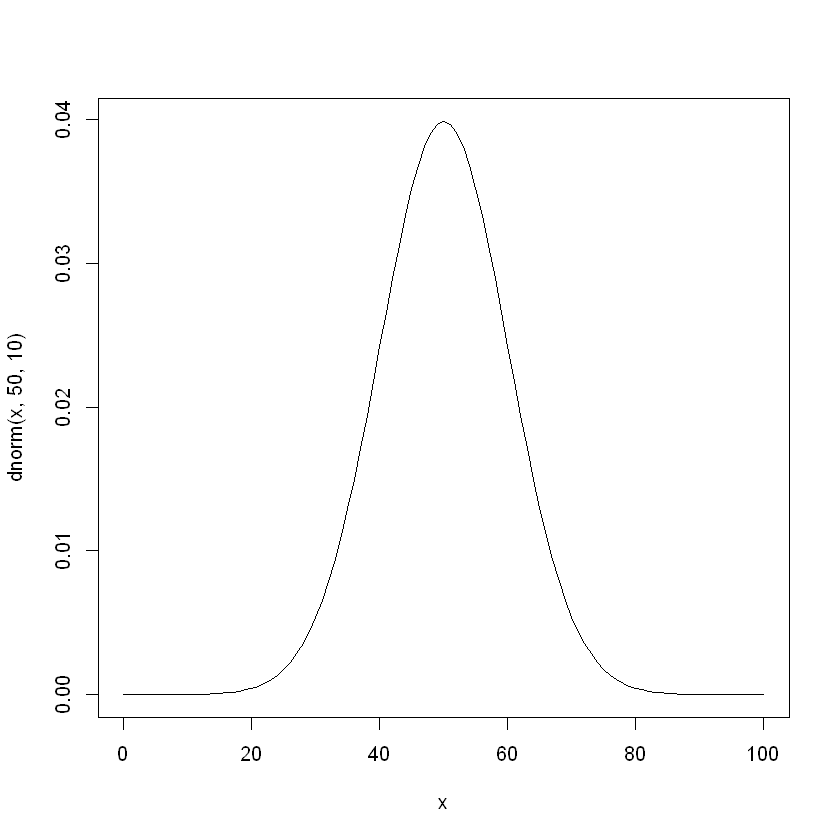

In [2]:
curve(dnorm(x,50,10),0,100)

## t 分布

curve(dt(x,100), -4,4) で 自由度 100 の t 分布を描くことができる。

自由度 100, 10, 5 の t 分布を描いてみよう


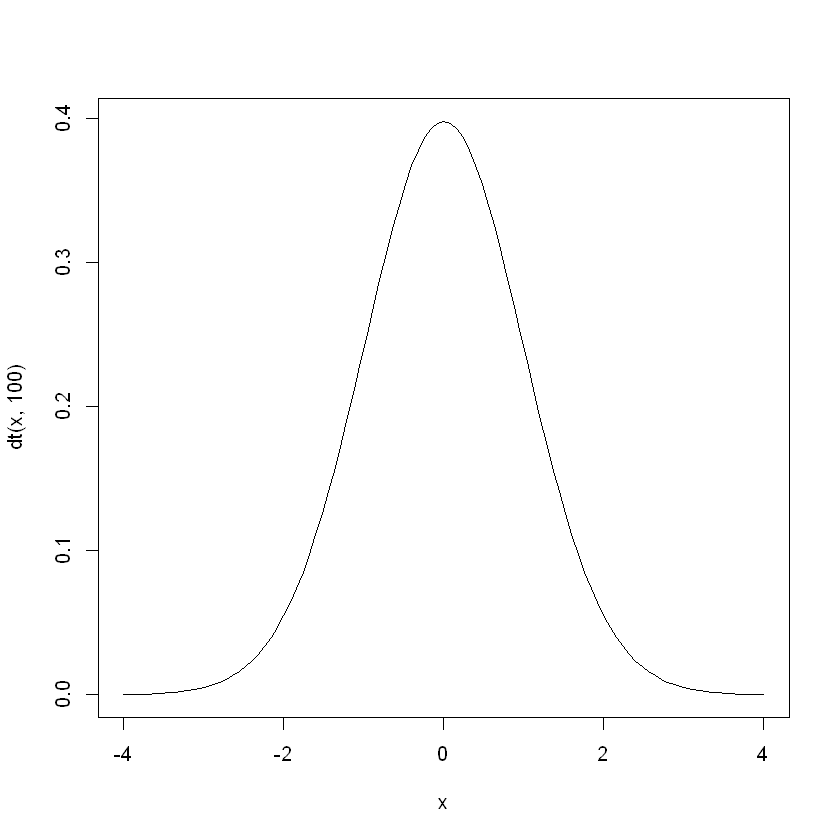

In [3]:
# 自由度 100の t 分布
curve(dt(x,100), -4,4)

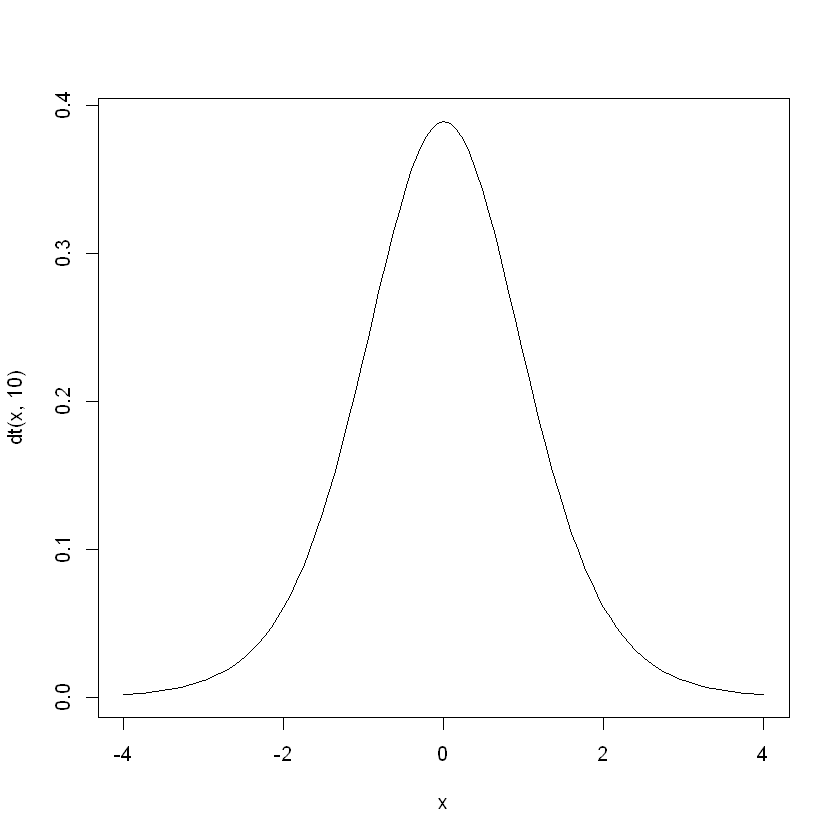

In [4]:

# 自由度 10 t 分布
curve(dt(x,10), -4,4)

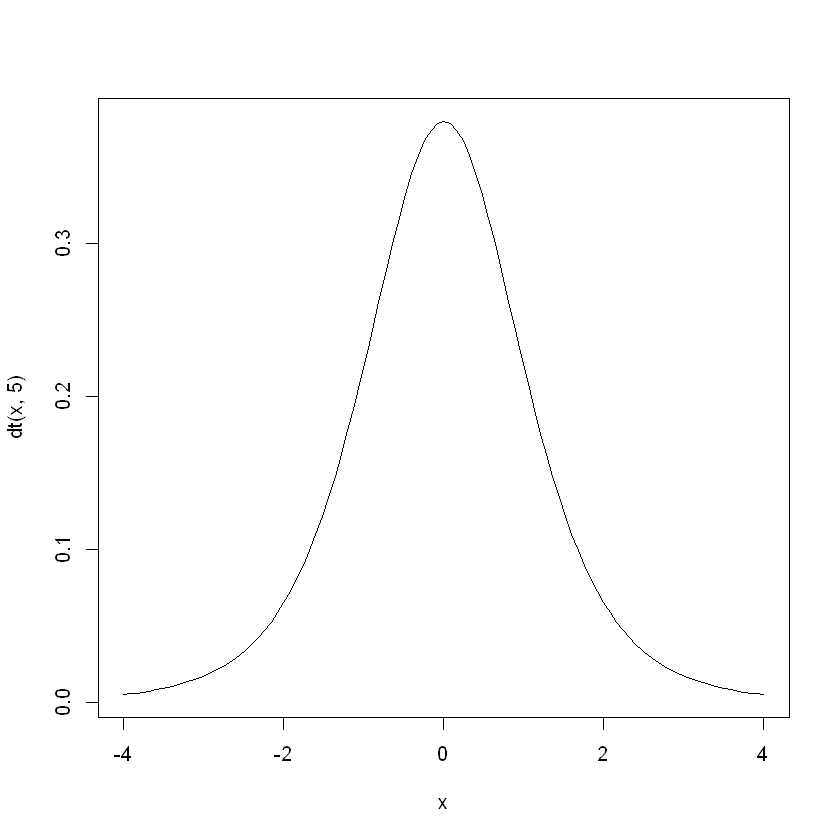

In [6]:

# 自由度 5の t 分布
curve(dt(x,5), -4,4)

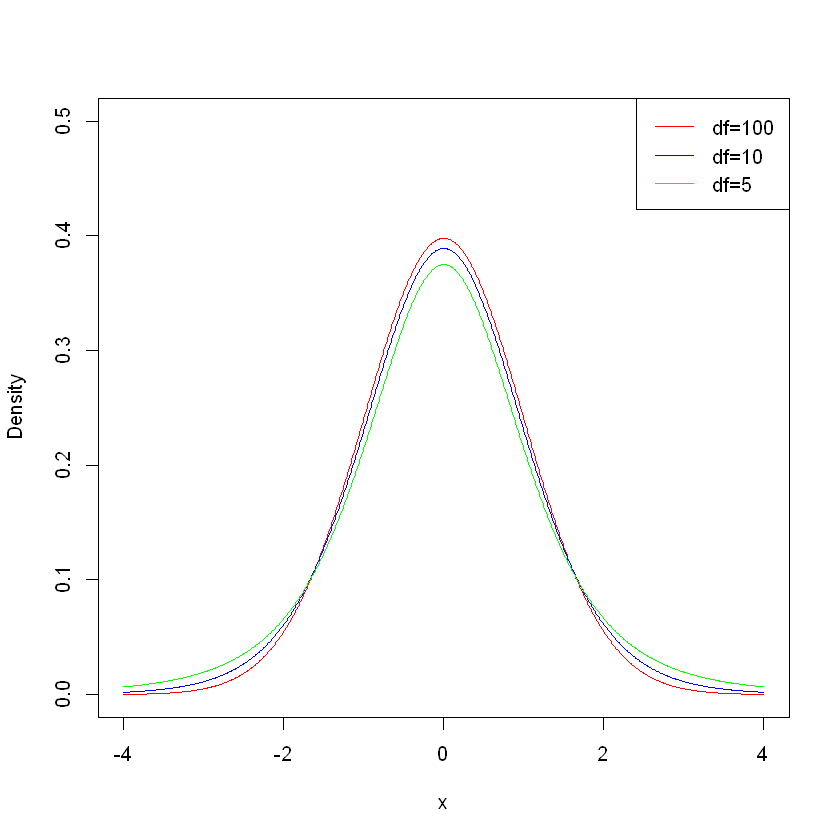

In [8]:

# R言語で自由度 100, 10, 4 のt分布を重ねてプロットするプログラム
x <- seq(-4, 4, 0.01)  # x座標の範囲を指定

# 自由度 100 のt分布をプロット（赤色）
plot(x, dt(x, df = 100), type = "l", ylim = c(0, 0.5), col = "red", xlab = "x", ylab = "Density")
lines(x, dt(x, df = 10), col = "blue")  # 自由度 10 のt分布をプロット（青色）
lines(x, dt(x, df = 4), col = "green")   # 自由度 4 のt分布をプロット（緑色）
legend("topright", legend = c("df=100", "df=10", "df=4"), col = c("red", "blue", "green"), lty = 1)

In [14]:
len1 = length(x)
rms1 <- (sum(off1**2.0)/len1) ** 0.5
rms2 <- (sum(off1**2.0)/(len1-1)) ** 0.5
sd1 <- sd(x)
cat('rms1 = ', rms1, '  rms2 = ', rms2, '  sd1 = ',sd1)

rms1 =  0.3756115   rms2 =  0.3765541   sd1 =  0.3765541

In [20]:
len2 <- c(25,50,100,200)
rmsv1 <- numeric(4)
rmsv2 <- numeric(4)
for (i1 in 1:4) {
    len1 <- len2[i1]
    x1 <- x[1:len1]
    mean1 <- mean(x1)
    off1 <- x1 - mean1
    rms1[i1] <- (sum(off1**2.0)/len1) ** 0.5
    rms2[i1] <- (sum(off1**2.0)/(len1-1)) ** 0.5
}


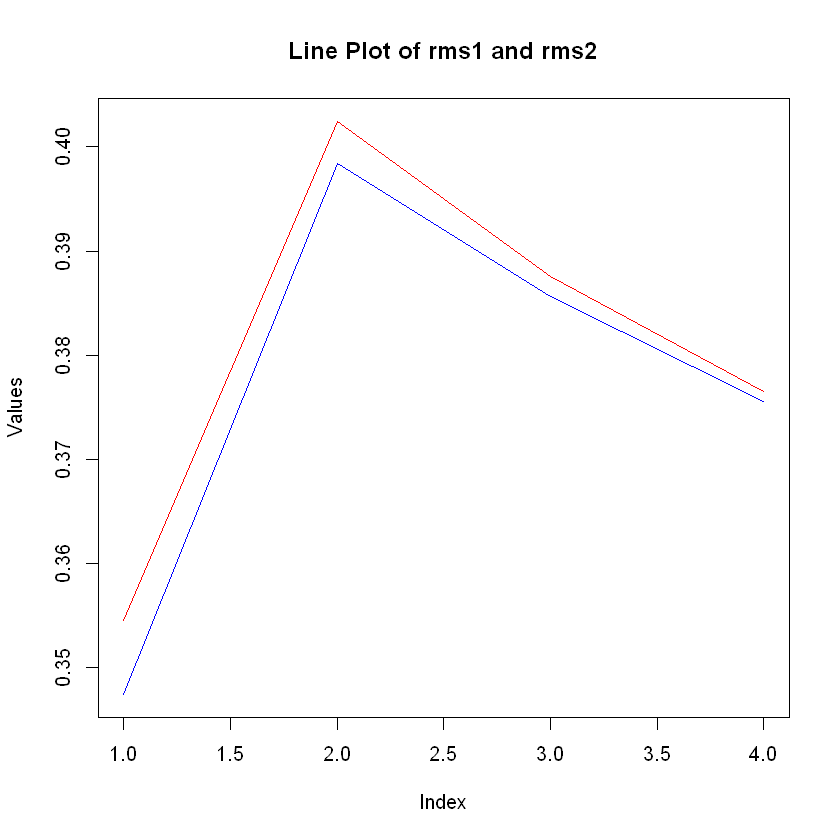

In [21]:
# プロットの初期設定
plot(rms1, type = 'l', col = 'blue', ylim = range(c(rms1, rms2)),
     xlab = 'Index', ylab = 'Values', main = 'Line Plot of rms1 and rms2')

# rms2を既存のグラフに追加
lines(rms2, col = 'red')

### しょうがないのでもっと大規模に


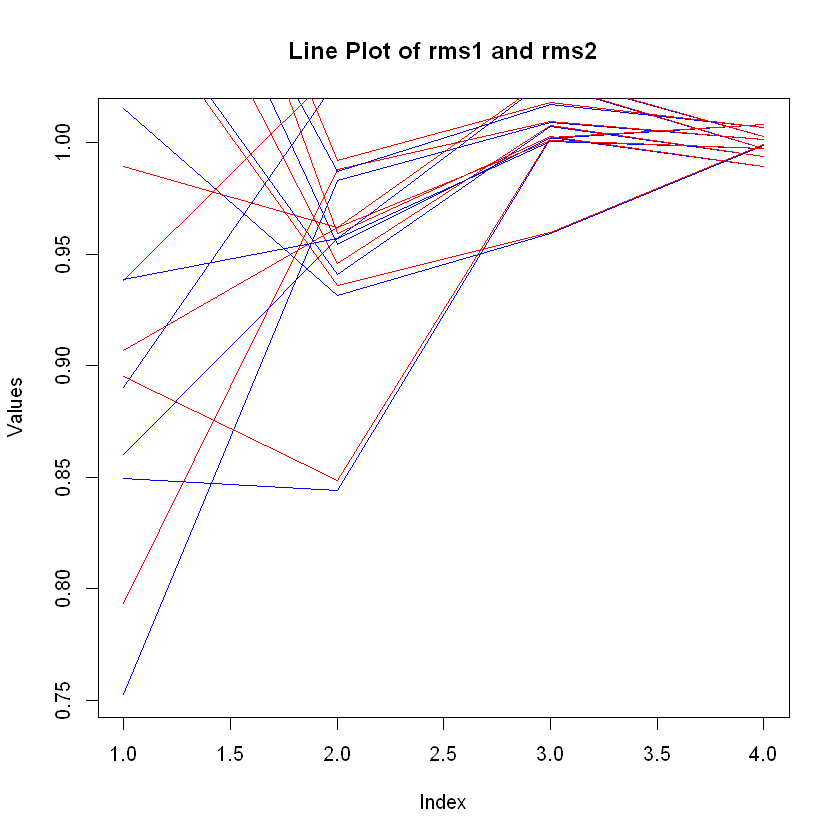

In [2]:

for (i2 in 1:9) {
    x <- rnorm(10000,mean = 0, sd = 1)
    len2 <- c(10,100,1000,10000)
    rms1 <- numeric(4)
    rms2 <- numeric(4)
    for (i1 in 1:4) {
        len1 <- len2[i1]
        x1 <- x[1:len1]
        mean1 <- mean(x1)
        off1 <- x1 - mean1
        rms1[i1] <- (sum(off1**2.0)/len1) ** 0.5
        rms2[i1] <- (sum(off1**2.0)/(len1-1)) ** 0.5
    }
    if (i2 == 1) {
    plot(rms1, type = 'l', col = 'blue', ylim = range(c(rms1, rms2)),
        xlab = 'Index', ylab = 'Values', main = 'Line Plot of rms1 and rms2')
    }
    else {
        lines(rms1, col = 'blue')
    }
    lines(rms2, col = 'red')
}


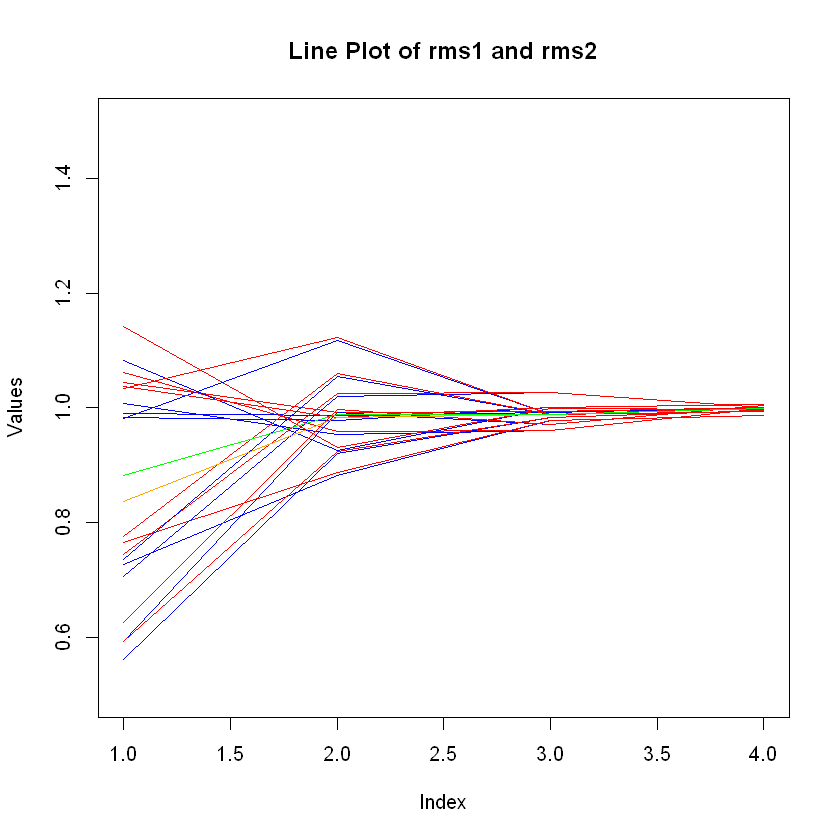

In [2]:
n_try <- 10
rms_m1 <- rep(0.0,4)
rms_m2 <- rep(0.0,4)
for (i2 in 1:n_try) {
    x <- rnorm(10000,mean = 0, sd = 1)
    len2 <- c(10,100,1000,10000)
    rms1 <- numeric(4)
    rms2 <- numeric(4)
    for (i1 in 1:4) {
        len1 <- len2[i1]
        x1 <- x[1:len1]
        mean1 <- mean(x1)
        off1 <- x1 - mean1
        rms1[i1] <- (sum(off1**2.0)/len1) ** 0.5
        rms2[i1] <- (sum(off1**2.0)/(len1-1)) ** 0.5
        rms_m1[i1] <- rms_m1[i1] + rms1[i1]
        rms_m2[i1] <- rms_m2[i1] + rms2[i1]
    }
    if (i2 == 1) {
    plot(rms1, type = 'l', col = 'blue', ylim = c(0.5,1.5),
        xlab = 'Index', ylab = 'Values', main = 'Line Plot of rms1 and rms2')
    }
    else {
        lines(rms1, col = 'blue')
    }
    lines(rms2, col = 'red')
}
lines(rms_m1/n_try, col = 'orange')
lines(rms_m2/n_try, col = 'green')


In [6]:
print(rms_m1)

[1] 91.26404 97.80902 99.56503 99.87353


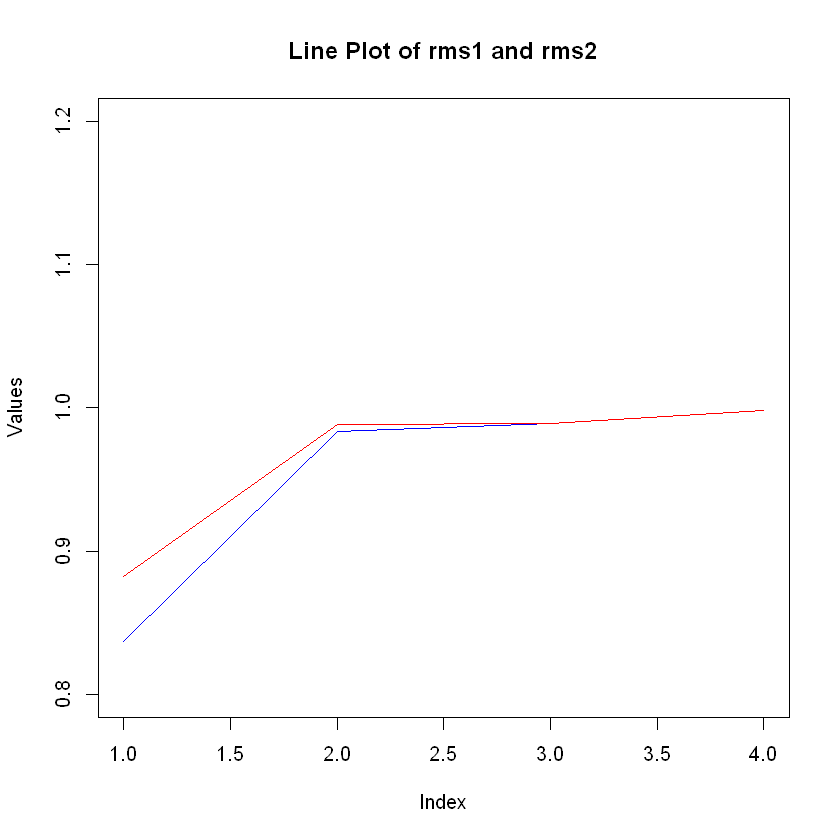

In [4]:

plot(rms_m1/n_try, type = 'l', col = 'blue', ylim = c(0.8,1.2),
    xlab = 'Index', ylab = 'Values', main = 'Line Plot of rms1 and rms2')
lines(rms_m2/n_try, col = 'red')